In [8]:
from sklearn import datasets
import altair as alt
import pandas as pd

In [9]:
diabetes = datasets.load_diabetes()


In [10]:
bmi_and_bp = [(x[2], x[3]) for x in diabetes.data]
df = pd.DataFrame(bmi_and_bp, columns=["bmi", "blood_pressure"])

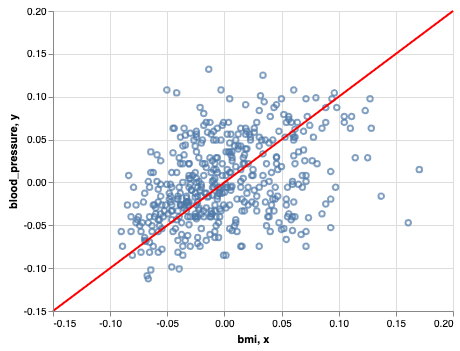

In [19]:
alt.Chart(df).mark_point().encode(x="bmi", y="blood_pressure") + alt.Chart(pd.DataFrame([(-.15, -.15), (.2, .2)], columns=["x", "y"])).mark_line(color='red').encode(x="x", y="y")

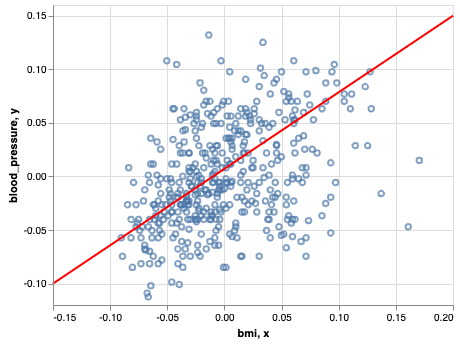

In [22]:
alt.Chart(df).mark_point().encode(x="bmi", y="blood_pressure") + alt.Chart(pd.DataFrame([(-.15, -.10), (.2, .15)], columns=["x", "y"])).mark_line(color='red').encode(x="x", y="y")

In [29]:
def compute_y(x, m, b):
    return x * m + b

def compute_all_y(list_of_x, m, b):
    return [compute_y(x, m, b) for x in list_of_x]

def compute_mse(list_of_known, list_of_predictions):
    squared_errors_sum = 0
    for i in range(len(list_of_known)):
        error = list_of_predictions[i] - list_of_known[i]
        squared_errors_sum += error * error
    return squared_errors_sum / len(list_of_known)

MSE: 0.0021033973181115878


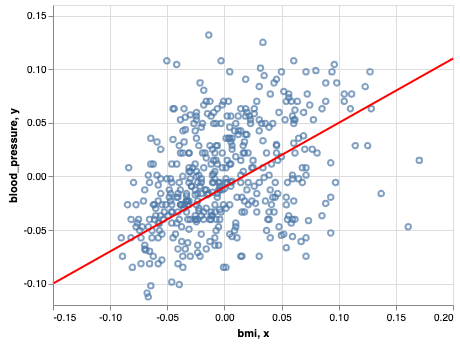

In [57]:
m = .6
b = -.01
mse = compute_mse(df["blood_pressure"], compute_all_y(df["bmi"], m, b))
print("MSE:", mse)
alt.Chart(df).mark_point().encode(x="bmi", y="blood_pressure") + alt.Chart(pd.DataFrame([(-.15, compute_y(-.15, m, b)), (.2, compute_y(.2, m, b))], columns=["x", "y"])).mark_line(color='red').encode(x="x", y="y")